<a href="https://colab.research.google.com/github/kushagrasharma-13/Artificial_Neural_network/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression on Salary Dataset

Correlation

Plotting

Mean Sqaured Error, Variance Score, R2 Score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error as MSE, explained_variance_score as EVS, r2_score

In [ ]:
# Load "Salary_Data.csv" dataset
dataset = pd.read_csv("/content/drive/MyDrive/Python/Datasets/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0, 0.5, 'Years of Experience')

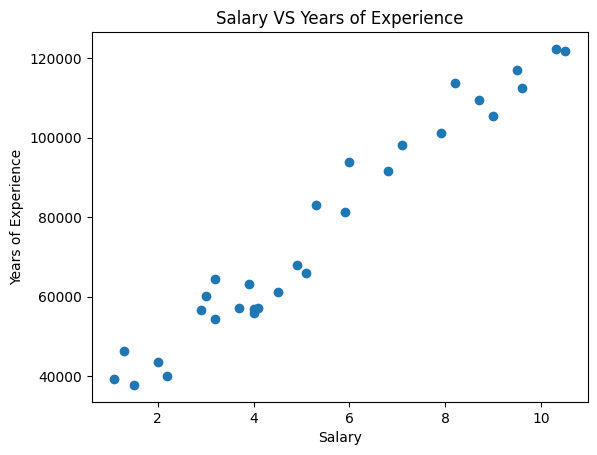

In [ ]:
yearsOfExperience = dataset.iloc[:,0]
salary =  dataset.iloc[:,1]
plt.scatter(yearsOfExperience, salary)
plt.title("Salary VS Years of Experience")
plt.xlabel("Salary")
plt.ylabel("Years of Experience")

Variations for loading independent variable

In [ ]:
#1.
x = dataset.iloc[:,0].values
print(x.ndim)
x

1


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
#2.
x = dataset.iloc[:,:-1].values
print(x.ndim)
x

2


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
#3.
x = dataset.iloc[:,[0]].values
print(x.ndim)
x

2


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
#4. 
x = dataset["YearsExperience"].values
print(x.ndim)
x

1


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
y = dataset["Salary"].values
print(y.ndim)
y

1


array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=0)

In [ ]:
print(x_train.ndim)
x_train

1


array([ 7.9,  2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3, 10.5,  3. ,  2.2,
        5.9,  6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,  4.9,  4. ])

In [ ]:
print(x_test.ndim)
x_test

1


array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7,  9.6,  4. ,  5.3])

In [ ]:
print(y_train.ndim)
y_train

1


array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [ ]:
print(y_test.ndim)
y_test

1


array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [ ]:
x1_train = x_train.reshape(-1,1)
print(x1_train.ndim)
x1_train

2


array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [ ]:
y1_train = y_train.reshape(-1,1)
print(y1_train.ndim)
y1_train

2


array([[101302.],
       [ 56642.],
       [ 66029.],
       [ 64445.],
       [ 61111.],
       [113812.],
       [ 91738.],
       [ 46205.],
       [121872.],
       [ 60150.],
       [ 39891.],
       [ 81363.],
       [ 93940.],
       [ 57189.],
       [ 54445.],
       [105582.],
       [ 43525.],
       [ 39343.],
       [ 98273.],
       [ 67938.],
       [ 56957.]])

In [ ]:
LR = LinearRegression()
LR.fit(x1_train, y1_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(x_test.reshape(-1,1))
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [ ]:
diff = y_test-y_pred

In [ ]:
y_pred = y_pred.flatten()
y_test = y_test.flatten()
diff = diff.flatten()

In [ ]:
LR_df = pd.concat([pd.Series(y_pred), pd.Series(y_test),pd.Series(diff)], axis=1)
LR_df.columns = ['Prediction', 'Test', 'Difference']
LR_df

,Prediction,Test,Difference
0,40817.783270,37731.0,-3086.783270
1,123188.082589,122391.0,81573.216730
2,65154.462615,57081.0,16263.216730
3,63282.410357,63218.0,22400.216730
4,115699.873560,116969.0,76151.216730
...,...,...,...
76,NaN,NaN,40582.223842
77,NaN,NaN,33044.223842
78,NaN,NaN,36248.223842
79,NaN,NaN,-20592.776158


Text(0, 0.5, 'Years of Experience')

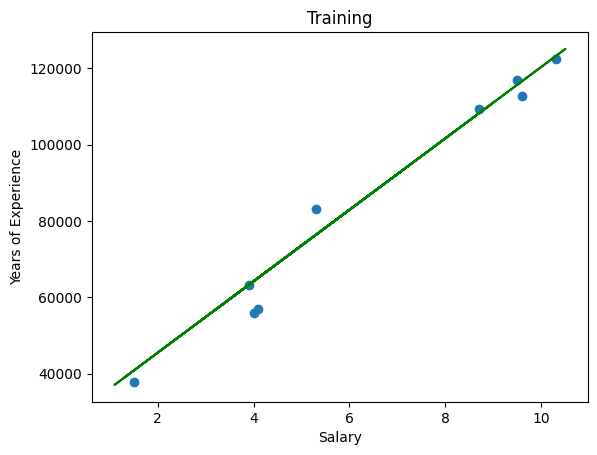

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_train, LR.predict(x_train.reshape(-1, 1)), c='green')
plt.title("Training")
plt.xlabel("Salary")
plt.ylabel("Years of Experience")

In [ ]:
print("Root Mean Squared Error: ", round(np.sqrt(MSE(y_test, y_pred)), 2))
print("Variance Score: ", round(EVS(y_test, y_pred), 2))
print("R Square Score: ", round(r2_score(y_test, y_pred), 2))

Root Mean Squared Error:  4834.26
Variance Score:  0.98
R Square Score:  0.97


In [ ]:
new_salary_predict = LR.predict([[15]])
print(new_salary_predict)

[[167181.3106341]]
